In [1]:
# import io
# import os
# import sys
# import glob
# from importlib import reload 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import ska


In [2]:
V = ska.Filter('Generic/Johnson.V')
J = ska.Filter('Paranal/VISTA.J')
H = ska.Filter('Paranal/VISTA.H')
Ks = ska.Filter('Paranal/VISTA.Ks')

In [10]:
df = pd.read_csv('sun.csv')
ms = ska.Spectrum(df)
ms = ska.Spectrum('A')

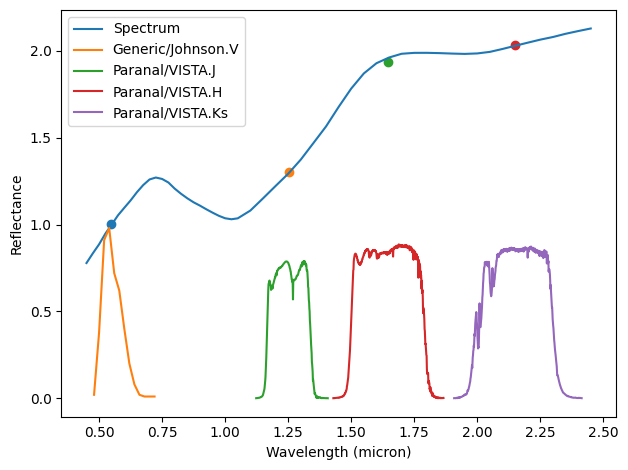

In [14]:
f, ax = ms.plot(filters=[V,J,H,Ks])
# ax.set_xscale('log')
# ax.set_yscale('log')

for f in [V,J,H,Ks]:
    flux = f.compute_flux(ms)
    ax.scatter(f.central_wavelength, flux)

ax.legend()

In [ ]:
array = np.genfromtxt( 'sun.csv', delimiter=',', skip_header=1 )

In [ ]:
array

In [ ]:
sun = ska.Spectrum( array )

In [ ]:
sun = pd.read_csv('sun.csv')
ceres = pd.read_csv('ceres.csv')
vesta = pd.read_csv('vesta.csv')

In [ ]:
vesta_arr = vesta.to_numpy()
vesta_arr[:,:2].shape
type(vesta_arr)

In [ ]:
set(1,3,3)

In [ ]:
test = ska.Spectrum(vesta_arr)

In [ ]:
fig, ax = plt.subplots()


ax.plot(ceres.Wavelength, ceres.Reflectance, label='Ceres')
ax.plot(vesta.Wavelength, vesta.Reflectance, label='Vesta')
ax.plot(test.Wavelength, test.Flux, linestyle='--', color='k', label='Vesta')

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Reflectance')
ax.legend()
# ax.set_xscale('log')
# ax.set_yscale('log')

In [ ]:
fig, ax = plt.subplots(1,2)

order = np.argsort( vesta.Wavelength )

Wavelength = np.array(vesta.loc[order,'Wavelength'].values)
Flux = np.array(vesta.loc[order,'Reflectance'].values)

ax[0].scatter( np.linspace(0, 1, len(vesta.Wavelength)), vesta.Wavelength, label='Vesta')
ax[0].scatter( np.linspace(0, 1, len(vesta.Wavelength)), Wavelength, label='sorted')

ax[1].plot( vesta.Wavelength, vesta.Reflectance, label='Vesta')
ax[1].plot( Wavelength, Flux, label='sorted')
ax[1].set_xlim(0.8,1)

In [ ]:
fig, ax = plt.subplots()


ax.plot(sun.Wavelength, sun.Flux, label='Sun')

ax.plot( H.wave, H.trans, label='H')
ax.plot( K.wave, K.trans, label='H')

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Flux (W/m^2/nm)')
ax.set_title('Solar Spectrum')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')

In [ ]:
H.compute_flux( sun ),  V.compute_flux( sun )

In [ ]:
sun.compute_color( V, H, phot_sys='AB')

In [ ]:
skatools.compute_color( sun, V, H, phot_sys='Vega')

In [ ]:
df = pd.read_fwf('a000001.sp41.txt', header=None)
df.columns = ['wave', 'reflec', 'unc', 'flag']

In [ ]:
df

In [ ]:
df.to_csv('ceres.csv', index=False)